In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

In [2]:
#Lembre-se de extrair o arquivo zip da pasta data/
df = pd.read_json('data/challenge.json')

In [31]:
df.head(5)    

,branch_id,customer_code,group_code,is_churn,item_code,item_total_price,order_id,quantity,register_date,sales_channel,segment_code,seller_code,total_price,unit_price,item_total_price_real
0,0,143,0,0.0,854,292.91,21804,10,2017-11-10T00:00:00Z,0,0,190,1613.53,25.04,250.40
1,0,433,0,0.0,246,287.19,5486,20,2011-05-16T00:00:00Z,1,5,153,11163.69,12.33,246.60
2,0,486,0,0.0,1420,184.84,22662,12,2018-01-24T00:00:00Z,0,0,166,6432.12,12.80,153.60
3,0,107,0,0.0,1963,189.18,3956,18,2010-07-28T00:00:00Z,1,0,156,831.82,10.51,189.18
4,0,768,0,0.0,1786,66.87,4730,5,2010-12-17T00:00:00Z,1,0,218,1736.48,11.82,59.10


In [15]:
df[df['order_id']==21804]

,branch_id,customer_code,group_code,is_churn,item_code,item_total_price,order_id,quantity,register_date,sales_channel,segment_code,seller_code,total_price,unit_price
0,0,143,0,0.0,854,292.91,21804,10,2017-11-10T00:00:00Z,0,0,190,1613.53,25.04
1321,0,143,0,0.0,1963,36.93,21804,3,2017-11-10T00:00:00Z,0,0,190,1613.53,11.79
45311,0,143,0,0.0,1120,59.99,21804,2,2017-11-10T00:00:00Z,0,0,190,1613.53,25.64
64466,0,143,0,0.0,293,38.04,21804,4,2017-11-10T00:00:00Z,0,0,190,1613.53,8.13
66993,0,143,0,0.0,2673,115.04,21804,6,2017-11-10T00:00:00Z,0,0,190,1613.53,16.39
111078,0,143,0,0.0,1962,21.77,21804,2,2017-11-10T00:00:00Z,0,0,190,1613.53,10.43
113630,0,143,0,0.0,1842,19.25,21804,2,2017-11-10T00:00:00Z,0,0,190,1613.53,8.23
118193,0,143,0,0.0,1781,99.64,21804,2,2017-11-10T00:00:00Z,0,0,190,1613.53,42.59
130909,0,143,0,0.0,416,61.29,21804,4,2017-11-10T00:00:00Z,0,0,190,1613.53,13.10
150070,0,143,0,0.0,853,493.55,21804,12,2017-11-10T00:00:00Z,0,0,190,1613.53,35.16


In [16]:
df[df['order_id']==21804].item_total_price.sum()

1880.3899999999996

In [17]:
df['item_total_price_real'] = df['unit_price']*df['quantity'] 

In [18]:
df.head()

,branch_id,customer_code,group_code,is_churn,item_code,item_total_price,order_id,quantity,register_date,sales_channel,segment_code,seller_code,total_price,unit_price,item_total_price_real
0,0,143,0,0.0,854,292.91,21804,10,2017-11-10T00:00:00Z,0,0,190,1613.53,25.04,250.40
1,0,433,0,0.0,246,287.19,5486,20,2011-05-16T00:00:00Z,1,5,153,11163.69,12.33,246.60
2,0,486,0,0.0,1420,184.84,22662,12,2018-01-24T00:00:00Z,0,0,166,6432.12,12.80,153.60
3,0,107,0,0.0,1963,189.18,3956,18,2010-07-28T00:00:00Z,1,0,156,831.82,10.51,189.18
4,0,768,0,0.0,1786,66.87,4730,5,2010-12-17T00:00:00Z,1,0,218,1736.48,11.82,59.10


In [34]:
(df['item_total_price_real']==df['item_total_price']).sum()/len(df)

0.35891854344805996

In [35]:
(df['item_total_price_real']==df['item_total_price']).mean()

0.35891854344805996

## Analise dos itens
Parece que existe colunas faltantes, impostos

In [37]:
(df['item_total_price_real']>df['item_total_price']).mean()

0.06568082650126206

In [38]:
df.shape

(204428, 15)

In [40]:
df.order_id.nunique()

24618

In [43]:
grouped = df.groupby('order_id').agg({"item_total_price_real":sum, "total_price":"first"})

In [44]:
grouped.head()

,item_total_price_real,total_price
order_id,,
0,710.74,710.79
1,341.50,341.65
2,3035.73,3035.75
3,831.14,831.24
4,1006.40,1006.41


In [46]:
(grouped['item_total_price_real']==grouped['total_price']).mean()

0.6039889511739378

In [48]:
(grouped['item_total_price_real']>grouped['total_price']).mean()

0.20647493703793973

In [49]:
## Verificar com time negocio pq isso acontece. 

In [50]:
df.head()

,branch_id,customer_code,group_code,is_churn,item_code,item_total_price,order_id,quantity,register_date,sales_channel,segment_code,seller_code,total_price,unit_price,item_total_price_real
0,0,143,0,0.0,854,292.91,21804,10,2017-11-10T00:00:00Z,0,0,190,1613.53,25.04,250.40
1,0,433,0,0.0,246,287.19,5486,20,2011-05-16T00:00:00Z,1,5,153,11163.69,12.33,246.60
2,0,486,0,0.0,1420,184.84,22662,12,2018-01-24T00:00:00Z,0,0,166,6432.12,12.80,153.60
3,0,107,0,0.0,1963,189.18,3956,18,2010-07-28T00:00:00Z,1,0,156,831.82,10.51,189.18
4,0,768,0,0.0,1786,66.87,4730,5,2010-12-17T00:00:00Z,1,0,218,1736.48,11.82,59.10


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204428 entries, 0 to 204427
Data columns (total 15 columns):
branch_id                204428 non-null int64
customer_code            204428 non-null int64
group_code               204428 non-null int64
is_churn                 202513 non-null float64
item_code                204428 non-null int64
item_total_price         204428 non-null float64
order_id                 204428 non-null int64
quantity                 204428 non-null int64
register_date            204428 non-null object
sales_channel            204428 non-null int64
segment_code             204428 non-null int64
seller_code              204428 non-null int64
total_price              204428 non-null float64
unit_price               204428 non-null float64
item_total_price_real    204428 non-null float64
dtypes: float64(5), int64(9), object(1)
memory usage: 23.4+ MB


In [54]:
df.nunique(dropna=True)

branch_id                    1
customer_code              838
group_code                   4
is_churn                     2
item_code                 2981
item_total_price         55336
order_id                 24618
quantity                   290
register_date             3121
sales_channel              106
segment_code                 8
seller_code                290
total_price              22713
unit_price               19828
item_total_price_real    46117
dtype: int64

In [55]:
del df['branch_id']

In [56]:
df.head()

,customer_code,group_code,is_churn,item_code,item_total_price,order_id,quantity,register_date,sales_channel,segment_code,seller_code,total_price,unit_price,item_total_price_real
0,143,0,0.0,854,292.91,21804,10,2017-11-10T00:00:00Z,0,0,190,1613.53,25.04,250.40
1,433,0,0.0,246,287.19,5486,20,2011-05-16T00:00:00Z,1,5,153,11163.69,12.33,246.60
2,486,0,0.0,1420,184.84,22662,12,2018-01-24T00:00:00Z,0,0,166,6432.12,12.80,153.60
3,107,0,0.0,1963,189.18,3956,18,2010-07-28T00:00:00Z,1,0,156,831.82,10.51,189.18
4,768,0,0.0,1786,66.87,4730,5,2010-12-17T00:00:00Z,1,0,218,1736.48,11.82,59.10


In [72]:
df.rename(columns={"group_code":"groupcode"}, inplace=True)

In [57]:
df['register_date'] = pd.to_datetime(df['register_date'],format='%Y-%m-%dT%H:%M:%SZ')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204428 entries, 0 to 204427
Data columns (total 14 columns):
customer_code            204428 non-null int64
group_code               204428 non-null int64
is_churn                 202513 non-null float64
item_code                204428 non-null int64
item_total_price         204428 non-null float64
order_id                 204428 non-null int64
quantity                 204428 non-null int64
register_date            204428 non-null datetime64[ns]
sales_channel            204428 non-null int64
segment_code             204428 non-null int64
seller_code              204428 non-null int64
total_price              204428 non-null float64
unit_price               204428 non-null float64
item_total_price_real    204428 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(8)
memory usage: 21.8 MB


In [60]:
df['register_date'].min()

Timestamp('2008-01-04 00:00:00')

In [61]:
df['register_date'].max()

Timestamp('2018-07-08 00:00:00')

In [77]:
(df['register_date'].max()-df['register_date'].min())

Timedelta('3838 days 00:00:00')

In [78]:
type((df['register_date'].max()-df['register_date'].min()))

pandas._libs.tslibs.timedeltas.Timedelta

In [80]:
type((df['register_date'].max()-df['register_date'].min()).days)

int

In [83]:
(df['register_date'].max()-df['register_date'].min()).days

3838

In [82]:
(df['register_date'].max()-df['register_date'].min()).days/365

10.515068493150684

In [87]:
df.head()

,customer_code,groupcode,is_churn,item_code,item_total_price,order_id,quantity,register_date,sales_channel,segment_code,seller_code,total_price,unit_price,item_total_price_real
0,143,0,0.0,854,292.91,21804,10,2017-11-10,0,0,190,1613.53,25.04,250.40
1,433,0,0.0,246,287.19,5486,20,2011-05-16,1,5,153,11163.69,12.33,246.60
2,486,0,0.0,1420,184.84,22662,12,2018-01-24,0,0,166,6432.12,12.80,153.60
3,107,0,0.0,1963,189.18,3956,18,2010-07-28,1,0,156,831.82,10.51,189.18
4,768,0,0.0,1786,66.87,4730,5,2010-12-17,1,0,218,1736.48,11.82,59.10


In [90]:
(df.groupby('order_id').register_date.nunique()!=1).sum()

0

In [93]:
grouped = df.groupby('order_id', as_index=False).agg({"item_total_price_real":sum, "register_date":"first"})

In [94]:
grouped.head()

,order_id,item_total_price_real,register_date
0,0,710.74,2008-01-04
1,1,341.50,2008-01-05
2,2,3035.73,2008-01-07
3,3,831.14,2008-01-07
4,4,1006.40,2008-01-07


In [95]:
grouped.rename(columns={"item_total_price_real":"total_value"}, inplace=True)

In [96]:
grouped.head()

,order_id,total_value,register_date
0,0,710.74,2008-01-04
1,1,341.50,2008-01-05
2,2,3035.73,2008-01-07
3,3,831.14,2008-01-07
4,4,1006.40,2008-01-07


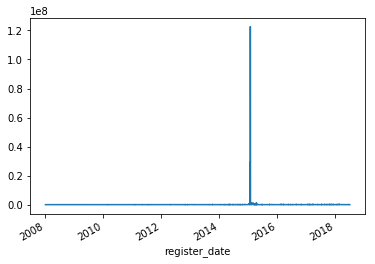

In [97]:
grouped.groupby('register_date').total_value.sum().plot()

In [99]:
grouped.total_value.describe()

count    2.461800e+04
mean     9.404629e+03
std      7.925176e+05
min      1.000000e-02
25%      7.959500e+02
50%      1.336850e+03
75%      2.405060e+03
max      1.208692e+08
Name: total_value, dtype: float64

In [100]:
grouped.total_value.describe([0.5,0.75,0.85, 0.95, 0.99])

count    2.461800e+04
mean     9.404629e+03
std      7.925176e+05
min      1.000000e-02
50%      1.336850e+03
75%      2.405060e+03
85%      3.394809e+03
95%      7.071306e+03
99%      4.008914e+04
max      1.208692e+08
Name: total_value, dtype: float64

In [102]:
q99 = grouped.total_value.quantile(0.99)

In [104]:
grouped = grouped[grouped.total_value<=q99]

In [105]:
grouped.total_value.describe([0.5,0.75,0.85, 0.95, 0.99])

count    24371.000000
mean      2175.329683
std       3418.379129
min          0.010000
50%       1322.180000
75%       2352.565000
85%       3267.240000
95%       6189.110000
99%      19380.655000
max      40084.920000
Name: total_value, dtype: float64

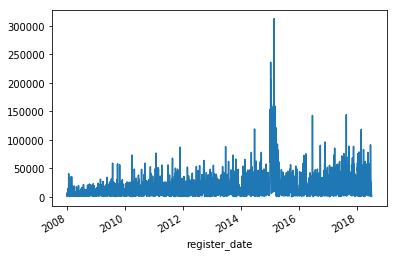

In [106]:
grouped.groupby('register_date').total_value.sum().plot()

In [123]:
grouper = pd.Grouper(key='register_date',freq='M')

grouped.groupby(grouper).total_value.sum().plot()

In [129]:
grouped.head()

,order_id,total_value,register_date
0,0,710.74,2008-01-04
1,1,341.50,2008-01-05
2,2,3035.73,2008-01-07
3,3,831.14,2008-01-07
4,4,1006.40,2008-01-07


In [194]:
grouped[(grouped['register_date']>='2015') & (grouped['register_date']<='2017')]

,order_id,register_date,customer_code
13717,13717,2015-01-06,626
13718,13718,2015-01-06,496
13719,13719,2015-01-06,46
13720,13720,2015-01-06,211
13721,13721,2015-01-07,751
13722,13722,2015-01-07,615
13725,13725,2015-01-07,55
13726,13726,2015-01-07,778
13729,13729,2015-01-07,435
13730,13730,2015-01-07,812


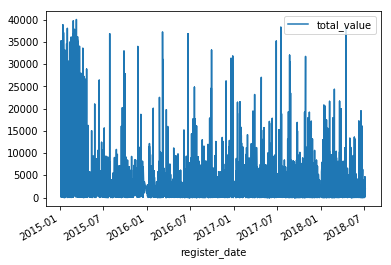

In [132]:
grouped[grouped['register_date']>'2015'].plot(x='register_date',y='total_value')

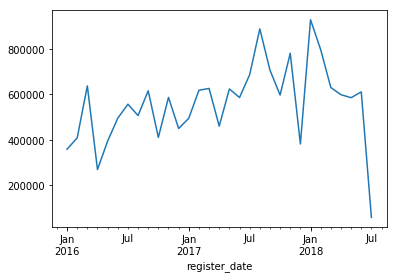

In [136]:
grouper = pd.Grouper(key='register_date',freq='M')
grouped[grouped['register_date']>'2016'].groupby(grouper).total_value.sum().plot()

In [139]:
grouped.head()

,order_id,total_value,register_date
0,0,710.74,2008-01-04
1,1,341.50,2008-01-05
2,2,3035.73,2008-01-07
3,3,831.14,2008-01-07
4,4,1006.40,2008-01-07


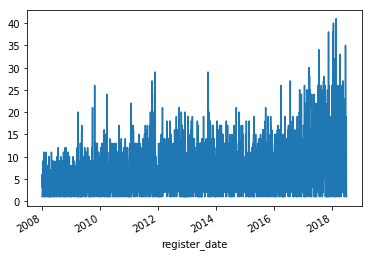

In [141]:
grouped.groupby('register_date').order_id.nunique().plot()

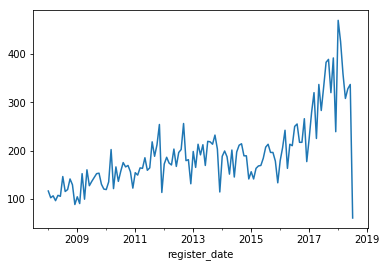

In [142]:
grouper = pd.Grouper(key='register_date',freq='M')
grouped.groupby(grouper).order_id.nunique().plot()

In [ ]:
## Temos outliers 2016/2015
#Parece q temos algumas orders com valores muito altos. Mas nao numero de orders elevados. 

In [143]:
df.customer_code.nunique()

838

In [145]:
grouped = df.groupby('order_id', as_index=False).agg({"register_date":"first", "customer_code":"first"})

In [146]:
grouped.head()

,order_id,register_date,customer_code
0,0,2008-01-04,588
1,1,2008-01-05,114
2,2,2008-01-07,435
3,3,2008-01-07,507
4,4,2008-01-07,613


In [159]:
time_alive = grouped.groupby('customer_code', as_index=False).register_date.agg([min, max])

In [160]:
time_alive.head()

,min,max
customer_code,,
0,2008-09-23,2018-06-08
1,2008-02-26,2018-03-12
2,2008-01-22,2018-06-28
3,2008-02-28,2018-05-08
4,2008-02-23,2018-01-18


In [157]:
time_alive.reset_index(inplace=True)

In [158]:
time_alive.head()

,customer_code,min,max
0,0,2008-09-23,2018-06-08
1,1,2008-02-26,2018-03-12
2,2,2008-01-22,2018-06-28
3,3,2008-02-28,2018-05-08
4,4,2008-02-23,2018-01-18


In [161]:
time_alive['time_alive'] = time_alive['max']  -  time_alive['min'] 

In [162]:
time_alive.head()

,min,max,time_alive
customer_code,,,
0,2008-09-23,2018-06-08,3545 days
1,2008-02-26,2018-03-12,3667 days
2,2008-01-22,2018-06-28,3810 days
3,2008-02-28,2018-05-08,3722 days
4,2008-02-23,2018-01-18,3617 days


In [166]:
time_alive['time_alive']  =time_alive['time_alive'].dt.days

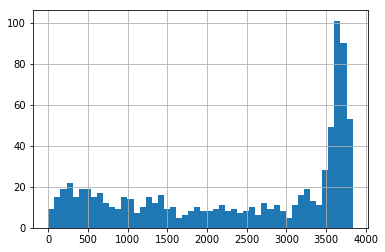

In [167]:
time_alive.time_alive.hist(bins=50)

In [168]:
time_alive.time_alive.describe()

count     838.000000
mean     2377.073986
std      1316.946579
min         0.000000
25%      1069.750000
50%      2823.500000
75%      3633.500000
max      3836.000000
Name: time_alive, dtype: float64

In [170]:
2823.500000/365

7.735616438356164

In [171]:
grouped.head()

,order_id,register_date,customer_code
0,0,2008-01-04,588
1,1,2008-01-05,114
2,2,2008-01-07,435
3,3,2008-01-07,507
4,4,2008-01-07,613


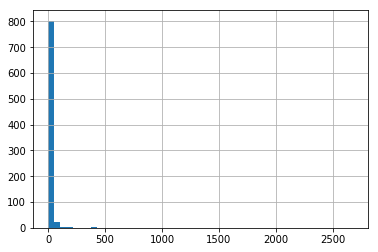

In [172]:
grouped.groupby('customer_code').order_id.nunique().hist(bins=50)

In [173]:
grouped.groupby('customer_code').order_id.nunique().describe([0.5,0.75,0.85,0.95,0.99])

count     838.000000
mean       29.377088
std       109.926753
min         1.000000
50%        19.000000
75%        30.000000
85%        39.000000
95%        52.150000
99%       154.130000
max      2676.000000
Name: order_id, dtype: float64

In [177]:
grouped.groupby('customer_code').order_id.nunique().sort_values(ascending=False)

customer_code
114    2676
633    1466
644     598
250     426
658     403
422     303
269     208
763     204
29      173
326     122
776     121
470     109
572     107
426     102
524      95
484      94
836      93
103      91
8        90
110      74
160      73
415      72
702      65
3        63
5        62
157      60
75       60
558      59
413      58
602      56
       ... 
232       4
520       4
358       4
546       4
357       4
327       3
392       3
324       3
336       3
367       3
368       3
373       3
386       3
281       3
62        3
395       3
270       3
404       3
406       3
407       3
412       3
421       3
541       3
571       3
418       3
66        2
460       1
482       1
359       1
767       1
Name: order_id, Length: 838, dtype: int64

In [180]:
grouped.groupby('customer_code').order_id.nunique().sort_values(ascending=False)[:5]

customer_code
114    2676
633    1466
644     598
250     426
658     403
Name: order_id, dtype: int64

In [182]:
grouped.groupby('customer_code').order_id.nunique().sort_values(ascending=False)[:5].sum()

5569

In [183]:
grouped.order_id.nunique()

24618

In [184]:
5569/24618

0.22621658948736698

In [186]:
customers_count = grouped.groupby('customer_code').order_id.nunique()

In [188]:
customers_count[customers_count<=155].index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            828, 829, 830, 831, 832, 833, 834, 835, 836, 837],
           dtype='int64', name='customer_code', length=829)

In [190]:
grouped = grouped[grouped.customer_code.isin(customers_count[customers_count<=155].index)]

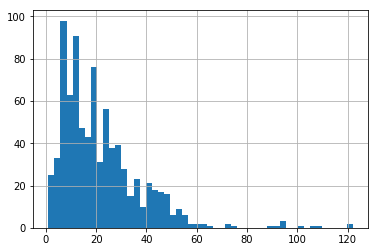

In [191]:
grouped.groupby('customer_code').order_id.nunique().hist(bins=50)

In [196]:
pd.__version__

'0.23.4'

In [197]:
grouped.head()

,order_id,register_date,customer_code
0,0,2008-01-04,588
2,2,2008-01-07,435
3,3,2008-01-07,507
4,4,2008-01-07,613
5,5,2008-01-07,558


In [198]:
time_alive.head()

,min,max,time_alive
customer_code,,,
0,2008-09-23,2018-06-08,3545
1,2008-02-26,2018-03-12,3667
2,2008-01-22,2018-06-28,3810
3,2008-02-28,2018-05-08,3722
4,2008-02-23,2018-01-18,3617


In [ ]:
time_alive.time_alive

In [205]:
time_alive.loc[435]

min           2008-01-07 00:00:00
max           2018-05-18 00:00:00
time_alive                   3784
Name: 435, dtype: object

In [207]:
grouped['time_alive'] =grouped.customer_code.map(time_alive.time_alive)

In [208]:
grouped.head()

,order_id,register_date,customer_code,time_alive
0,0,2008-01-04,588,3811
2,2,2008-01-07,435,3784
3,3,2008-01-07,507,3794
4,4,2008-01-07,613,3675
5,5,2008-01-07,558,3734


In [210]:
time_vs_order = grouped.groupby('customer_code').agg({"order_id":"nunique", "time_alive":"first"})

In [212]:
time_vs_order.head()

,order_id,time_alive
customer_code,,
0,19,3545
1,42,3667
2,39,3810
3,63,3722
4,41,3617


In [213]:
time_vs_order.rename(columns={"order_id":"total_numb_orders"}, inplace=True)

In [214]:
time_vs_order.head()

,total_numb_orders,time_alive
customer_code,,
0,19,3545
1,42,3667
2,39,3810
3,63,3722
4,41,3617


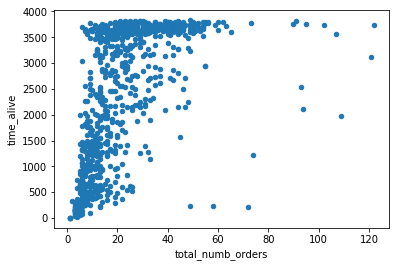

In [215]:
time_vs_order.plot.scatter(x='total_numb_orders', y='time_alive')

In [216]:
grouped.head()

,order_id,register_date,customer_code,time_alive
0,0,2008-01-04,588,3811
2,2,2008-01-07,435,3784
3,3,2008-01-07,507,3794
4,4,2008-01-07,613,3675
5,5,2008-01-07,558,3734


In [217]:
time_alive.head()

,min,max,time_alive
customer_code,,,
0,2008-09-23,2018-06-08,3545
1,2008-02-26,2018-03-12,3667
2,2008-01-22,2018-06-28,3810
3,2008-02-28,2018-05-08,3722
4,2008-02-23,2018-01-18,3617


In [221]:
merger_times_cust = grouped.merge(time_alive, how='left', left_on='customer_code', right_index=True)

In [222]:
#Churn

In [228]:
df.sample(10)


,customer_code,groupcode,is_churn,item_code,item_total_price,order_id,quantity,register_date,sales_channel,segment_code,seller_code,total_price,unit_price,item_total_price_real
191374,8,0,0.0,2629,141.75,4416,8,2010-10-21,1,0,177,7138.83,17.10,136.80
177886,306,0,0.0,357,836.80,14552,40,2015-05-15,0,0,27,15029.27,20.92,836.80
151630,534,0,0.0,1841,68.40,18137,5,2016-11-04,0,0,3,4155.87,13.68,68.40
49079,658,1,1.0,2625,1035.00,16944,50,2016-05-24,0,3,147,271229.28,20.70,1035.00
184153,777,0,0.0,1787,89.52,14113,6,2015-03-03,6,0,234,787.28,89.52,537.12
84835,658,1,1.0,416,6237.00,16944,630,2016-05-24,0,3,147,271229.28,9.90,6237.00
202631,29,0,1.0,2861,176.91,8377,6,2012-09-03,0,0,138,401.90,25.89,155.34
93890,496,0,0.0,1966,318.84,19846,12,2017-05-23,6,0,242,3921.65,26.57,318.84
23682,408,0,0.0,1778,302.40,3637,9,2010-05-24,1,0,199,1422.15,33.60,302.40
163840,154,0,0.0,1839,82.51,20650,20,2017-08-09,0,0,3,1596.37,3.82,76.40


In [229]:
df[df.customer_code==658].sort_values('register_date')

,customer_code,groupcode,is_churn,item_code,item_total_price,order_id,quantity,register_date,sales_channel,segment_code,seller_code,total_price,unit_price,item_total_price_real
179359,658,1,1.0,2626,253.50,2098,10,2009-06-30,2,3,185,78046.75,25.35,253.50
186589,658,1,1.0,357,1168.65,2098,100,2009-06-30,2,3,185,78046.75,11.13,1113.00
187955,658,1,1.0,360,411.60,2098,20,2009-06-30,2,3,185,78046.75,20.58,411.60
141815,658,1,1.0,1964,2606.00,2098,200,2009-06-30,2,3,185,78046.75,13.03,2606.00
64009,658,1,1.0,2627,2920.32,2098,96,2009-06-30,2,3,185,78046.75,30.42,2920.32
33695,658,1,1.0,2865,599.34,2098,10,2009-06-30,2,3,185,78046.75,57.08,570.80
148476,658,1,1.0,722,1278.48,2098,20,2009-06-30,2,3,185,78046.75,60.88,1217.60
119787,658,1,1.0,2629,2824.00,2098,200,2009-06-30,2,3,185,78046.75,14.12,2824.00
173080,658,1,1.0,762,1812.20,2098,20,2009-06-30,2,3,185,78046.75,90.61,1812.20
189553,658,1,1.0,246,1022.11,2098,60,2009-06-30,2,3,185,78046.75,15.21,912.60


In [231]:
today = df.register_date.max()

In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204428 entries, 0 to 204427
Data columns (total 14 columns):
customer_code            204428 non-null int64
groupcode                204428 non-null int64
is_churn                 202513 non-null float64
item_code                204428 non-null int64
item_total_price         204428 non-null float64
order_id                 204428 non-null int64
quantity                 204428 non-null int64
register_date            204428 non-null datetime64[ns]
sales_channel            204428 non-null int64
segment_code             204428 non-null int64
seller_code              204428 non-null int64
total_price              204428 non-null float64
unit_price               204428 non-null float64
item_total_price_real    204428 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(8)
memory usage: 21.8 MB


In [234]:
df.is_churn.value_counts(dropna=False)

 0.0    163799
 1.0     38714
NaN       1915
Name: is_churn, dtype: int64

In [238]:
customer_list = df.groupby('customer_code').is_churn.any()

In [242]:
customer_list[customer_list].index

Int64Index([ 29,  61,  62, 110, 114, 129, 166, 204, 221, 232, 234, 235, 245,
            255, 256, 260, 269, 270, 271, 272, 293, 294, 296, 303, 312, 318,
            322, 324, 327, 328, 331, 332, 333, 334, 336, 339, 341, 342, 344,
            345, 348, 355, 357, 358, 361, 362, 367, 368, 373, 375, 379, 386,
            387, 395, 396, 397, 398, 403, 405, 406, 407, 412, 418, 421, 423,
            439, 442, 470, 478, 484, 520, 541, 546, 554, 571, 572, 633, 644,
            658, 763, 836],
           dtype='int64', name='customer_code')

In [245]:
customer_list.value_counts(dropna=False)

False    757
True      81
Name: is_churn, dtype: int64

In [248]:
customer_list_na = df[df.is_churn.isna()].customer_code

In [250]:
df[(df.customer_code.isin(customer_list_na)) & (df.is_churn.notna())]

,customer_code,groupcode,is_churn,item_code,item_total_price,order_id,quantity,register_date,sales_channel,segment_code,seller_code,total_price,unit_price,item_total_price_real


In [251]:
df_churn = df[df.is_churn.notna()]

In [254]:
df_churn.is_churn.value_counts(dropna=False)

0.0    163799
1.0     38714
Name: is_churn, dtype: int64

In [255]:
df_churn.is_churn = df_churn.is_churn.astype(int)

/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [257]:
df_churn = df_churn.drop_duplicates(['customer_code','order_id','register_date'])

In [258]:
df_churn.head()

,customer_code,groupcode,is_churn,item_code,item_total_price,order_id,quantity,register_date,sales_channel,segment_code,seller_code,total_price,unit_price,item_total_price_real
0,143,0,0,854,292.91,21804,10,2017-11-10,0,0,190,1613.53,25.04,250.40
1,433,0,0,246,287.19,5486,20,2011-05-16,1,5,153,11163.69,12.33,246.60
2,486,0,0,1420,184.84,22662,12,2018-01-24,0,0,166,6432.12,12.80,153.60
3,107,0,0,1963,189.18,3956,18,2010-07-28,1,0,156,831.82,10.51,189.18
4,768,0,0,1786,66.87,4730,5,2010-12-17,1,0,218,1736.48,11.82,59.10


In [261]:
df_churn.drop(columns=['item_total_price','unit_price','item_total_price_real','quantity','item_code'], inplace=True)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [262]:
df_churn.head()

,customer_code,groupcode,is_churn,order_id,register_date,sales_channel,segment_code,seller_code,total_price
0,143,0,0,21804,2017-11-10,0,0,190,1613.53
1,433,0,0,5486,2011-05-16,1,5,153,11163.69
2,486,0,0,22662,2018-01-24,0,0,166,6432.12
3,107,0,0,3956,2010-07-28,1,0,156,831.82
4,768,0,0,4730,2010-12-17,1,0,218,1736.48
